# Cornershop's Data Science Test

## Dev: Mateus Broilo
mateus.brilo90@gmail.com

* Objectives: Default Training & evaluation

# Summary

* Initials
    * Loading Libraries and Packages
    * Configurations
    * Global Variables
* Loading data
    * Prepared Dataset  
* Model
    * Splitting Train/Test data: 80/20
        * Normalization
    * Baseline Model: Linear Regressor
    * Support Vector Regressor: Default
    * XGBoost: Default
    * Catboost: Default
* Default Results

# Initials
* Loading Libraries and Packages
* Configuration
* Global Variables

## Loading Libraries and Packages

In [1]:
# general
import warnings
import time
import gc

#data
import pandas as pd
import numpy as np
from datetime import (datetime, date)
import geopy.distance

## visualization
import matplotlib.pyplot as plt
import seaborn as sns

## model
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost as xgb
import catboost as cb

C:\Users\mbroilo\Anaconda3\envs\broilo\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
ls ..\data\

 O volume na unidade C nÃ£o tem nome.
 O NÃºmero de SÃ©rie do Volume Ã© 1210-43E2

 Pasta de C:\Users\mbroilo\Documents\Arbeit\Personal\projects\cornershop\data

01/04/2022  20:54    <DIR>          .
31/03/2022  18:23    <DIR>          ..
29/03/2022  20:02        64.304.021 20220329_merged_full.csv
29/03/2022  20:02        12.563.082 20220329_merged_predict.csv
29/03/2022  20:03        51.741.160 20220329_merged_train_test.csv
01/04/2022  20:49         1.125.788 20220331_prep_20220329_merged_train_test.csv
               4 arquivo(s)    129.734.051 bytes
               2 pasta(s)   142.325.379.072 bytes disponÃ­veis


## Configurations

In [51]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

rc={'font.size': 14, 'axes.labelsize': 15, 'legend.fontsize': 12, 
    'axes.titlesize': 24, 'xtick.labelsize': 14, 'ytick.labelsize': 14}

sns.set(rc=rc)
sns.set_palette("Set2")
sns.set_style("darkgrid")#sns.set_style("whitegrid")

## Global Variables

In [4]:
PATH_RAWDATA = "../raw_data/"
PATH_DATA = "../data/"
DATASET_PREP = "20220331_prep_20220329_merged_train_test.csv"
DATASET_VAL = "20220329_merged_predict.csv"
DATE = time.strftime("%Y%m%d")
SEED = 42 # The answer to the ultimate question of life, the universe and everything is 42.

# Loading Data
* Prepared Dataset 

## Prepared Dataset 

In [5]:
df = pd.read_csv(PATH_DATA + DATASET_PREP, sep=',', index_col='order_id')
print(df.shape)
df.head()

(8000, 16)


,on_demand,day_of_week,total_minutes,pure_time,found_rate,picking_speed,accepted_rate,rating,distance,no_item,quantity,item,seniority_41dc7c9e385c4d2b6c1f7836973951bf,seniority_50e13ee63f086c2fe84229348bc91b5b,seniority_6c90661e6d2c7579f5ce337c3391dbb9,seniority_bb29b8d0d196b5db5a5350e5e3ae2b1f
order_id,,,,,,,,,,,,,,,,
0004a3841c1eeb6c6e77585a941c21e0,True,friday,39.001464,20.300000,0.8473,2.30,0.920000,4.88,0.579554,8.0,8.000,4,1,0,0,0
0005a6ecbbde1e8d273f5577bcff2c9c,True,friday,41.164442,20.666667,0.8407,1.57,0.840000,4.72,0.989345,2.0,2.000,1,0,1,0,0
0007baeb6700fc203be2d1f1e11222d7,False,saturday,136.453089,15.000000,0.9012,2.50,1.000000,4.92,3.735978,39.0,39.000,22,1,0,0,0
0012195a6a8ca9ec308a3010eeea8ebc,False,saturday,72.853598,18.000000,0.8781,1.27,0.920000,4.88,1.226007,13.0,13.000,11,0,0,1,0
0013011fa72b498b9feb84f4e7104980,False,saturday,143.040919,15.000000,0.8301,3.12,0.857143,5.00,1.905397,65.0,64.636,44,0,1,0,0


* I'll drop **item** since it's correlated to **no_item** and also **day_of_week** since it has only some deliveries promised on sunday.
    * Moreover, I'm not quite sure if it's ok to transform sunday to saturday. (Probably not!)

# Model
* Splitting Train/Test data: 80/20
    * Normalization
* Baseline Model: Linear Regressor
* Support Vector Regressor: Default
* XGBoost: Default
* Catboost: Default

## Splitting Train/Test data: 80/20

In [6]:
features = [
    'seniority_41dc7c9e385c4d2b6c1f7836973951bf',
    'seniority_50e13ee63f086c2fe84229348bc91b5b',
    'seniority_6c90661e6d2c7579f5ce337c3391dbb9',
    'seniority_bb29b8d0d196b5db5a5350e5e3ae2b1f',
    'on_demand',
    #day_of_week,
    'pure_time',
    'found_rate',
    'picking_speed',
    'accepted_rate',
    'rating',
    'distance',
    'no_item',
    'quantity',
    'item'
]

features_set1 = list(df[features].drop(columns=['no_item','item']))
features_set2 = list(df[features].drop(columns=[
    'seniority_41dc7c9e385c4d2b6c1f7836973951bf',
    'seniority_50e13ee63f086c2fe84229348bc91b5b',
    'seniority_6c90661e6d2c7579f5ce337c3391dbb9',
    'seniority_bb29b8d0d196b5db5a5350e5e3ae2b1f' 
]))
features_set3 = list(df[features].drop(columns=['rating','no_item','item']))
features_set4 = features


label = ['total_minutes']

Xs1 = df[features_set1]
Xs2 = df[features_set2]
Xs3 = df[features_set3]
Xs4 = df[features_set4]
y = df[label]

Xs1_train, Xs1_test, y_train, y_test = train_test_split(Xs1, y, train_size = 0.8, random_state = SEED)
Xs2_train, Xs2_test, y_train, y_test = train_test_split(Xs2, y, train_size = 0.8, random_state = SEED)
Xs3_train, Xs3_test, y_train, y_test = train_test_split(Xs3, y, train_size = 0.8, random_state = SEED)
Xs4_train, Xs4_test, y_train, y_test = train_test_split(Xs4, y, train_size = 0.8, random_state = SEED)

In [7]:
print("Features Set1:")
print("Train dataset shape: " + f"{Xs1_train.shape}")
print("Test dataset shape: " + f"{Xs1_test.shape}")
print(40*"-")
print(f"Xs1_train + Xs1_test dataset: {Xs1_train.shape[0] + Xs1_test.shape[0]}")
print(f"Total dataset: {df.shape[0]}\n\n")

print("Features Set2:")
print("Train dataset shape: " + f"{Xs2_train.shape}")
print("Test dataset shape: " + f"{Xs2_test.shape}")
print(40*"-")
print(f"Xs2_train + Xs2_test dataset: {Xs2_train.shape[0] + Xs2_test.shape[0]}")
print(f"Total dataset: {df.shape[0]}\n\n")

print("Features Set3:")
print("Train dataset shape: " + f"{Xs3_train.shape}")
print("Test dataset shape: " + f"{Xs3_test.shape}")
print(40*"-")
print(f"Xs3_train + Xs3_test dataset: {Xs3_train.shape[0] + Xs3_test.shape[0]}")
print(f"Total dataset: {df.shape[0]}\n\n")

print("Features Set4:")
print("Train dataset shape: " + f"{Xs4_train.shape}")
print("Test dataset shape: " + f"{Xs4_test.shape}")
print(40*"-")
print(f"Xs4_train + Xs4_test dataset: {Xs4_train.shape[0] + Xs4_test.shape[0]}")
print(f"Total dataset: {df.shape[0]}")

Features Set1:
Train dataset shape: (6400, 12)
Test dataset shape: (1600, 12)
----------------------------------------
Xs1_train + Xs1_test dataset: 8000
Total dataset: 8000


Features Set2:
Train dataset shape: (6400, 10)
Test dataset shape: (1600, 10)
----------------------------------------
Xs2_train + Xs2_test dataset: 8000
Total dataset: 8000


Features Set3:
Train dataset shape: (6400, 11)
Test dataset shape: (1600, 11)
----------------------------------------
Xs3_train + Xs3_test dataset: 8000
Total dataset: 8000


Features Set4:
Train dataset shape: (6400, 14)
Test dataset shape: (1600, 14)
----------------------------------------
Xs4_train + Xs4_test dataset: 8000
Total dataset: 8000


### Normalization

In [8]:
ss = StandardScaler()

# Set 1
scaler_s1 = ss.fit(Xs1_train)
Xs1norm_train = scaler_s1.transform(Xs1_train)
Xs1norm_test = scaler_s1.transform(Xs1_test)

# Set 2
scaler_s2 = ss.fit(Xs2_train)
Xs2norm_train = scaler_s2.transform(Xs2_train)
Xs2norm_test = scaler_s2.transform(Xs2_test)

# Set 3
scaler_s3 = ss.fit(Xs3_train)
Xs3norm_train = scaler_s3.transform(Xs3_train)
Xs3norm_test = scaler_s3.transform(Xs3_test)

# Set 4
scaler_s4 = ss.fit(Xs4_train)
Xs4norm_train = scaler_s4.transform(Xs4_train)
Xs4norm_test = scaler_s4.transform(Xs4_test)

## Baseline Model: Linear Regression

In [9]:
lr = LinearRegression()

# Set 1
lr.fit(Xs1norm_train, y_train)
trainScoreLRs1 = lr.score(Xs1norm_train, y_train)
y_pred_dLRs1 = lr.predict(Xs1norm_test)
print(f"How well the model generalized in training set 1: {trainScoreLRs1}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dLRs1)}")
rmseLRs1 = np.sqrt(mean_squared_error(y_test, y_pred_dLRs1))
print(f"RMSE: {rmseLRs1}")
r2LRs1 = r2_score(y_test, y_pred_dLRs1)
print(f"R2: {r2LRs1}")
ar2LRs1 = 1 - (1-r2LRs1)*(len(y_train)-1)/(len(y_train)-Xs1_train.shape[1]-1)
print(f"adjusted-R2: {ar2LRs1}\n\n")

# Set 2
lr.fit(Xs2norm_train, y_train)
trainScoreLRs2 = lr.score(Xs2norm_train, y_train)
y_pred_dLRs2 = lr.predict(Xs2norm_test)
print(f"How well the model generalized in training set2: {trainScoreLRs2}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dLRs2)}")
rmseLRs2 = np.sqrt(mean_squared_error(y_test, y_pred_dLRs2))
print(f"RMSE: {rmseLRs2}")
r2LRs2= r2_score(y_test, y_pred_dLRs2)
print(f"R2: {r2LRs2}")
ar2LRs2 = 1 - (1-r2LRs2)*(len(y_train)-1)/(len(y_train)-Xs2_train.shape[1]-1)
print(f"adjusted-R2: {ar2LRs2}\n\n")

# Set 3
lr.fit(Xs3norm_train, y_train)
trainScoreLRs3 = lr.score(Xs3norm_train, y_train)
y_pred_dLRs3 = lr.predict(Xs3norm_test)
print(f"How well the model generalized in training set3: {trainScoreLRs3}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dLRs3)}")
rmseLRs3 = np.sqrt(mean_squared_error(y_test, y_pred_dLRs3))
print(f"RMSE: {rmseLRs3}")
r2LRs3 = r2_score(y_test, y_pred_dLRs3)
print(f"R2: {r2LRs3}")
ar2LRs3 = 1 - (1-r2LRs3)*(len(y_train)-1)/(len(y_train)-Xs3_train.shape[1]-1)
print(f"adjusted-R2: {ar2LRs3}\n\n")

# Set 4
lr.fit(Xs4norm_train, y_train)
trainScoreLRs4 = lr.score(Xs4norm_train, y_train)
y_pred_dLRs4 = lr.predict(Xs4norm_test)
print(f"How well the model generalized in training set4: {trainScoreLRs4}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dLRs4)}")
rmseLRs4 = np.sqrt(mean_squared_error(y_test, y_pred_dLRs4))
print(f"RMSE: {rmseLRs4}")
r2LRs4 = r2_score(y_test, y_pred_dLRs4)
print(f"R2: {r2LRs4}")
ar2LRs4 = 1 - (1-r2LRs4)*(len(y_train)-1)/(len(y_train)-Xs4_train.shape[1]-1)
print(f"adjusted-R2: {ar2LRs4}\n\n")

How well the model generalized in training set 1: 0.37349996524621387
MSE: 773.6183119944211
RMSE: 27.813994894556608
R2: 0.41069341977740925
adjusted-R2: 0.40958622094185715


How well the model generalized in training set2: 0.42715436150445885
MSE: 696.0333964110981
RMSE: 26.382444852801232
R2: 0.4697940131454683
adjusted-R2: 0.46896413994644737


How well the model generalized in training set3: 0.3715979173760414
MSE: 778.4090467506779
RMSE: 27.899982916673586
R2: 0.40704406004510807
adjusted-R2: 0.4060230025404894


How well the model generalized in training set4: 0.42853398274241994
MSE: 696.6538464452807
RMSE: 26.39420100031976
R2: 0.46932138306138904
adjusted-R2: 0.46815779643067




## Support Vector Regression

In [10]:
svr = SVR(kernel='linear')

# Set 1
svr.fit(Xs1norm_train, y_train)
trainScoreSVRs1 = svr.score(Xs1norm_train, y_train)
y_pred_dSVRs1 = svr.predict(Xs1norm_test)
print(f"How well the model generalized in training set 1: {trainScoreSVRs1}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dSVRs1)}")
rmseSVRs1 = np.sqrt(mean_squared_error(y_test, y_pred_dSVRs1))
print(f"RMSE: {rmseSVRs1}")
r2SVRs1 = r2_score(y_test, y_pred_dSVRs1)
print(f"R2: {r2SVRs1}")
ar2SVRs1 = 1 - (1-r2SVRs1)*(len(y_train)-1)/(len(y_train)-Xs1_train.shape[1]-1)
print(f"adjusted-R2: {ar2SVRs1}\n\n")

# Set 2
svr.fit(Xs2norm_train, y_train)
trainScoreSVRs2 = svr.score(Xs2norm_train, y_train)
y_pred_dSVRs2 = svr.predict(Xs2norm_test)
print(f"How well the model generalized in training set 2: {trainScoreSVRs2}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dSVRs2)}")
rmseSVRs2 = np.sqrt(mean_squared_error(y_test, y_pred_dSVRs2))
print(f"RMSE: {rmseSVRs2}")
r2SVRs2 = r2_score(y_test, y_pred_dSVRs2)
print(f"R2: {r2SVRs2}")
ar2SVRs2 = 1 - (1-r2SVRs2)*(len(y_train)-1)/(len(y_train)-Xs2_train.shape[1]-1)
print(f"adjusted-R2: {ar2SVRs2}\n\n")

# Set 3
svr.fit(Xs3norm_train, y_train)
trainScoreSVRs3 = svr.score(Xs3norm_train, y_train)
y_pred_dSVRs3 = svr.predict(Xs3norm_test)
print(f"How well the model generalized in training set 3: {trainScoreSVRs3}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dSVRs3)}")
rmseSVRs3 = np.sqrt(mean_squared_error(y_test, y_pred_dSVRs3))
print(f"RMSE: {rmseSVRs3}")
r2SVRs3 = r2_score(y_test, y_pred_dSVRs3)
print(f"R2: {r2SVRs3}")
ar2SVRs3 = 1 - (1-r2SVRs3)*(len(y_train)-1)/(len(y_train)-Xs3_train.shape[1]-1)
print(f"adjusted-R2: {ar2SVRs3}\n\n")

# Set 4
svr.fit(Xs4norm_train, y_train)
trainScoreSVRs4 = svr.score(Xs4norm_train, y_train)
y_pred_dSVRs4 = svr.predict(Xs4norm_test)
print(f"How well the model generalized in training set 4: {trainScoreSVRs4}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dSVRs4)}")
rmseSVRs4 = np.sqrt(mean_squared_error(y_test, y_pred_dSVRs4))
print(f"RMSE: {rmseSVRs4}")
r2SVRs4 = r2_score(y_test, y_pred_dSVRs4)
print(f"R2: {r2SVRs4}")
ar2SVRs4 = 1 - (1-r2SVRs4)*(len(y_train)-1)/(len(y_train)-Xs4_train.shape[1]-1)
print(f"adjusted-R2: {ar2SVRs4}\n\n")

How well the model generalized in training set 1: 0.35566980605060206
MSE: 789.2745384137764
RMSE: 28.09403029851318
R2: 0.39876723200841113
adjusted-R2: 0.3976376260563367


How well the model generalized in training set 2: 0.4070294760740444
MSE: 717.7141423093365
RMSE: 26.79018742579709
R2: 0.4532786256166659
adjusted-R2: 0.45242290269542107


How well the model generalized in training set 3: 0.35579808359958787
MSE: 789.4052254539237
RMSE: 28.096356088537952
R2: 0.39866768067732894
adjusted-R2: 0.3976321992257714


How well the model generalized in training set 4: 0.40911081796075044
MSE: 715.1669014006712
RMSE: 26.742604611381278
R2: 0.45521899570048496
adjusted-R2: 0.4540244876252786




## XGBoost: Default

**Obs:** Doesn't require data normalization.

In [11]:
xgbr = xgb.XGBRegressor()

# Set1
xgbr.fit(Xs1_train, y_train)
trainScoreXGBs1 = xgbr.score(Xs1_train, y_train)
y_pred_dXGBs1 = xgbr.predict(Xs1_test)
print(f"How well the model generalized in training set1: {trainScoreXGBs1}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dXGBs1)}")
rmseXGBs1 = np.sqrt(mean_squared_error(y_test, y_pred_dXGBs1))
print(f"RMSE: {rmseXGBs1}")
r2XGBs1 = r2_score(y_test, y_pred_dXGBs1)
print(f"R2: {r2XGBs1}")
ar2XGBs1 = 1 - (1-r2XGBs1)*(len(y_train)-1)/(len(y_train)-Xs1_train.shape[1]-1)
print(f"adjusted-R2: {ar2XGBs1}\n\n")

# Set2
xgbr.fit(Xs2_train, y_train)
trainScoreXGBs2 = xgbr.score(Xs2_train, y_train)
y_pred_dXGBs2 = xgbr.predict(Xs2_test)
print(f"How well the model generalized in training set2: {trainScoreXGBs2}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dXGBs2)}")
rmseXGBs2 = np.sqrt(mean_squared_error(y_test, y_pred_dXGBs2))
print(f"RMSE: {rmseXGBs2}")
r2XGBs2 = r2_score(y_test, y_pred_dXGBs2)
print(f"R2: {r2XGBs2}")
ar2XGBs2 = 1 - (1-r2XGBs2)*(len(y_train)-1)/(len(y_train)-Xs2_train.shape[1]-1)
print(f"adjusted-R2: {ar2XGBs2}\n\n")

# Set3
xgbr.fit(Xs3_train, y_train)
trainScoreXGBs3 = xgbr.score(Xs3_train, y_train)
y_pred_dXGBs3 = xgbr.predict(Xs3_test)
print(f"How well the model generalized in training set3: {trainScoreXGBs3}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dXGBs3)}")
rmseXGBs3 = np.sqrt(mean_squared_error(y_test, y_pred_dXGBs3))
print(f"RMSE: {rmseXGBs3}")
r2XGBs3 = r2_score(y_test, y_pred_dXGBs3)
print(f"R2: {r2XGBs3}")
ar2XGBs3 = 1 - (1-r2XGBs3)*(len(y_train)-1)/(len(y_train)-Xs3_train.shape[1]-1)
print(f"adjusted-R2: {ar2XGBs3}\n\n")

# Set4
xgbr.fit(Xs4_train, y_train)
trainScoreXGBs4 = xgbr.score(Xs4_train, y_train)
y_pred_dXGBs4 = xgbr.predict(Xs4_test)
print(f"How well the model generalized in training set4: {trainScoreXGBs4}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dXGBs4)}")
rmseXGBs4 = np.sqrt(mean_squared_error(y_test, y_pred_dXGBs4))
print(f"RMSE: {rmseXGBs4}")
r2XGBs4 = r2_score(y_test, y_pred_dXGBs4)
print(f"R2: {r2XGBs4}")
ar2XGBs4 = 1 - (1-r2XGBs4)*(len(y_train)-1)/(len(y_train)-Xs4_train.shape[1]-1)
print(f"adjusted-R2: {ar2XGBs4}\n\n")

How well the model generalized in training set1: 0.8362749110965395
MSE: 763.0630388106765
RMSE: 27.623595689386214
R2: 0.418733937752212
adjusted-R2: 0.4176418455732589


How well the model generalized in training set2: 0.8515810953652131
MSE: 668.570162977525
RMSE: 25.856723747944653
R2: 0.49071423171535955
adjusted-R2: 0.4899171026368111


How well the model generalized in training set3: 0.816579275689828
MSE: 769.3414986201904
RMSE: 27.737005941885478
R2: 0.41395129801625363
adjusted-R2: 0.4129421346283668


How well the model generalized in training set4: 0.8581223079404614
MSE: 679.6193222781828
RMSE: 26.06950943685329
R2: 0.4822974941836189
adjusted-R2: 0.4811623594801844




## CatBoost: Default

**Obs:** Doesn't require data normalization.

In [12]:
cbr = cb.CatBoostRegressor()

# Set1
cbr.fit(Xs1_train, y_train, eval_set = (Xs1_test, y_test))
trainScoreCBs1 = cbr.score(Xs1_train, y_train)
y_pred_dCBs1 = cbr.predict(Xs1_test)

# Set2
cbr.fit(Xs2_train, y_train, eval_set = (Xs2_test, y_test))
trainScoreCBs2 = cbr.score(Xs2_train, y_train)
y_pred_dCBs2 = cbr.predict(Xs2_test)

# Set3
cbr.fit(Xs3_train, y_train, eval_set = (Xs3_test, y_test))
trainScoreCBs3 = cbr.score(Xs3_train, y_train)
y_pred_dCBs3 = cbr.predict(Xs3_test)

# Set4
cbr.fit(Xs4_train, y_train, eval_set = (Xs4_test, y_test))
trainScoreCBs4 = cbr.score(Xs4_train, y_train)
y_pred_dCBs4 = cbr.predict(Xs4_test)

Learning rate set to 0.06815
0:	learn: 33.5631424	test: 35.4166663	best: 35.4166663 (0)	total: 169ms	remaining: 2m 48s
1:	learn: 32.8513954	test: 34.6589902	best: 34.6589902 (1)	total: 175ms	remaining: 1m 27s
2:	learn: 32.2715090	test: 34.0319628	best: 34.0319628 (2)	total: 182ms	remaining: 1m
3:	learn: 31.7523391	test: 33.4551475	best: 33.4551475 (3)	total: 188ms	remaining: 46.8s
4:	learn: 31.2414164	test: 32.9185220	best: 32.9185220 (4)	total: 193ms	remaining: 38.5s
5:	learn: 30.7930992	test: 32.4425320	best: 32.4425320 (5)	total: 198ms	remaining: 32.8s
6:	learn: 30.3524165	test: 31.9700556	best: 31.9700556 (6)	total: 203ms	remaining: 28.7s
7:	learn: 29.9925030	test: 31.6000972	best: 31.6000972 (7)	total: 207ms	remaining: 25.7s
8:	learn: 29.6422626	test: 31.2217461	best: 31.2217461 (8)	total: 211ms	remaining: 23.2s
9:	learn: 29.3586452	test: 30.9011056	best: 30.9011056 (9)	total: 213ms	remaining: 21.1s
10:	learn: 29.0721926	test: 30.6125570	best: 30.6125570 (10)	total: 216ms	remainin

113:	learn: 24.5863851	test: 26.7804446	best: 26.7757873 (111)	total: 505ms	remaining: 3.93s
114:	learn: 24.5793152	test: 26.7792910	best: 26.7757873 (111)	total: 508ms	remaining: 3.91s
115:	learn: 24.5680474	test: 26.7774802	best: 26.7757873 (111)	total: 511ms	remaining: 3.9s
116:	learn: 24.5562768	test: 26.7727868	best: 26.7727868 (116)	total: 514ms	remaining: 3.88s
117:	learn: 24.5429270	test: 26.7688528	best: 26.7688528 (117)	total: 516ms	remaining: 3.86s
118:	learn: 24.5319720	test: 26.7668179	best: 26.7668179 (118)	total: 519ms	remaining: 3.84s
119:	learn: 24.5317696	test: 26.7662982	best: 26.7662982 (119)	total: 520ms	remaining: 3.82s
120:	learn: 24.5254282	test: 26.7578521	best: 26.7578521 (120)	total: 524ms	remaining: 3.8s
121:	learn: 24.5126083	test: 26.7518574	best: 26.7518574 (121)	total: 529ms	remaining: 3.8s
122:	learn: 24.4986891	test: 26.7490145	best: 26.7490145 (122)	total: 531ms	remaining: 3.79s
123:	learn: 24.4912658	test: 26.7519791	best: 26.7490145 (122)	total: 535

255:	learn: 23.2005357	test: 26.5990429	best: 26.5973674 (214)	total: 852ms	remaining: 2.47s
256:	learn: 23.1883038	test: 26.5963167	best: 26.5963167 (256)	total: 854ms	remaining: 2.47s
257:	learn: 23.1766592	test: 26.5900406	best: 26.5900406 (257)	total: 856ms	remaining: 2.46s
258:	learn: 23.1680188	test: 26.5927086	best: 26.5900406 (257)	total: 858ms	remaining: 2.45s
259:	learn: 23.1572008	test: 26.5747661	best: 26.5747661 (259)	total: 860ms	remaining: 2.45s
260:	learn: 23.1463497	test: 26.5753251	best: 26.5747661 (259)	total: 862ms	remaining: 2.44s
261:	learn: 23.1347135	test: 26.5765659	best: 26.5747661 (259)	total: 866ms	remaining: 2.44s
262:	learn: 23.1230575	test: 26.5763852	best: 26.5747661 (259)	total: 869ms	remaining: 2.44s
263:	learn: 23.1113834	test: 26.5770828	best: 26.5747661 (259)	total: 872ms	remaining: 2.43s
264:	learn: 23.1009122	test: 26.5786170	best: 26.5747661 (259)	total: 874ms	remaining: 2.42s
265:	learn: 23.0897640	test: 26.5772874	best: 26.5747661 (259)	total: 

398:	learn: 21.9462330	test: 26.5670187	best: 26.5670187 (398)	total: 1.21s	remaining: 1.82s
399:	learn: 21.9415860	test: 26.5650094	best: 26.5650094 (399)	total: 1.21s	remaining: 1.82s
400:	learn: 21.9309264	test: 26.5662335	best: 26.5650094 (399)	total: 1.22s	remaining: 1.81s
401:	learn: 21.9190302	test: 26.5668877	best: 26.5650094 (399)	total: 1.22s	remaining: 1.81s
402:	learn: 21.9161808	test: 26.5651646	best: 26.5650094 (399)	total: 1.22s	remaining: 1.81s
403:	learn: 21.9064098	test: 26.5631860	best: 26.5631860 (403)	total: 1.22s	remaining: 1.8s
404:	learn: 21.9036664	test: 26.5633386	best: 26.5631860 (403)	total: 1.23s	remaining: 1.8s
405:	learn: 21.8958927	test: 26.5674804	best: 26.5631860 (403)	total: 1.23s	remaining: 1.8s
406:	learn: 21.8906855	test: 26.5701710	best: 26.5631860 (403)	total: 1.23s	remaining: 1.79s
407:	learn: 21.8814579	test: 26.5683440	best: 26.5631860 (403)	total: 1.23s	remaining: 1.79s
408:	learn: 21.8722616	test: 26.5676083	best: 26.5631860 (403)	total: 1.2

536:	learn: 20.9295631	test: 26.5073443	best: 26.4894764 (502)	total: 1.56s	remaining: 1.35s
537:	learn: 20.9224489	test: 26.5059924	best: 26.4894764 (502)	total: 1.56s	remaining: 1.34s
538:	learn: 20.9164905	test: 26.5065430	best: 26.4894764 (502)	total: 1.56s	remaining: 1.34s
539:	learn: 20.9145600	test: 26.5055533	best: 26.4894764 (502)	total: 1.57s	remaining: 1.33s
540:	learn: 20.9103641	test: 26.4990228	best: 26.4894764 (502)	total: 1.57s	remaining: 1.33s
541:	learn: 20.9044230	test: 26.5012287	best: 26.4894764 (502)	total: 1.57s	remaining: 1.33s
542:	learn: 20.8985059	test: 26.5013680	best: 26.4894764 (502)	total: 1.57s	remaining: 1.33s
543:	learn: 20.8919145	test: 26.5039778	best: 26.4894764 (502)	total: 1.58s	remaining: 1.32s
544:	learn: 20.8826612	test: 26.5072894	best: 26.4894764 (502)	total: 1.58s	remaining: 1.32s
545:	learn: 20.8748047	test: 26.5084073	best: 26.4894764 (502)	total: 1.58s	remaining: 1.32s
546:	learn: 20.8702239	test: 26.5067957	best: 26.4894764 (502)	total: 

680:	learn: 20.0557860	test: 26.5332884	best: 26.4894764 (502)	total: 1.91s	remaining: 896ms
681:	learn: 20.0502770	test: 26.5327492	best: 26.4894764 (502)	total: 1.92s	remaining: 893ms
682:	learn: 20.0409613	test: 26.5307798	best: 26.4894764 (502)	total: 1.92s	remaining: 890ms
683:	learn: 20.0346898	test: 26.5343860	best: 26.4894764 (502)	total: 1.92s	remaining: 887ms
684:	learn: 20.0285337	test: 26.5320440	best: 26.4894764 (502)	total: 1.92s	remaining: 884ms
685:	learn: 20.0198053	test: 26.5333734	best: 26.4894764 (502)	total: 1.92s	remaining: 881ms
686:	learn: 20.0170375	test: 26.5363892	best: 26.4894764 (502)	total: 1.93s	remaining: 878ms
687:	learn: 20.0122247	test: 26.5376544	best: 26.4894764 (502)	total: 1.93s	remaining: 875ms
688:	learn: 20.0043512	test: 26.5393934	best: 26.4894764 (502)	total: 1.93s	remaining: 872ms
689:	learn: 19.9999437	test: 26.5413631	best: 26.4894764 (502)	total: 1.93s	remaining: 869ms
690:	learn: 19.9943527	test: 26.5423353	best: 26.4894764 (502)	total: 

815:	learn: 19.2549147	test: 26.5536121	best: 26.4894764 (502)	total: 2.25s	remaining: 508ms
816:	learn: 19.2518921	test: 26.5542871	best: 26.4894764 (502)	total: 2.26s	remaining: 506ms
817:	learn: 19.2448312	test: 26.5557842	best: 26.4894764 (502)	total: 2.26s	remaining: 503ms
818:	learn: 19.2382321	test: 26.5566064	best: 26.4894764 (502)	total: 2.26s	remaining: 500ms
819:	learn: 19.2322525	test: 26.5597604	best: 26.4894764 (502)	total: 2.27s	remaining: 497ms
820:	learn: 19.2267487	test: 26.5614112	best: 26.4894764 (502)	total: 2.27s	remaining: 495ms
821:	learn: 19.2227120	test: 26.5619844	best: 26.4894764 (502)	total: 2.27s	remaining: 492ms
822:	learn: 19.2191425	test: 26.5621466	best: 26.4894764 (502)	total: 2.27s	remaining: 489ms
823:	learn: 19.2136373	test: 26.5605001	best: 26.4894764 (502)	total: 2.28s	remaining: 486ms
824:	learn: 19.2084882	test: 26.5633873	best: 26.4894764 (502)	total: 2.28s	remaining: 483ms
825:	learn: 19.2036439	test: 26.5627460	best: 26.4894764 (502)	total: 

959:	learn: 18.4936643	test: 26.5941787	best: 26.4894764 (502)	total: 2.61s	remaining: 109ms
960:	learn: 18.4870355	test: 26.5920021	best: 26.4894764 (502)	total: 2.62s	remaining: 106ms
961:	learn: 18.4787219	test: 26.5932227	best: 26.4894764 (502)	total: 2.62s	remaining: 103ms
962:	learn: 18.4728980	test: 26.5913078	best: 26.4894764 (502)	total: 2.62s	remaining: 101ms
963:	learn: 18.4636298	test: 26.5885271	best: 26.4894764 (502)	total: 2.63s	remaining: 98ms
964:	learn: 18.4573674	test: 26.5863890	best: 26.4894764 (502)	total: 2.63s	remaining: 95.3ms
965:	learn: 18.4538944	test: 26.5882514	best: 26.4894764 (502)	total: 2.63s	remaining: 92.6ms
966:	learn: 18.4477802	test: 26.5877609	best: 26.4894764 (502)	total: 2.63s	remaining: 89.8ms
967:	learn: 18.4391061	test: 26.5895351	best: 26.4894764 (502)	total: 2.64s	remaining: 87.2ms
968:	learn: 18.4296753	test: 26.5844435	best: 26.4894764 (502)	total: 2.64s	remaining: 84.4ms
969:	learn: 18.4229583	test: 26.5873250	best: 26.4894764 (502)	tot

52:	learn: 24.5918865	test: 26.0667459	best: 26.0667459 (52)	total: 148ms	remaining: 2.64s
53:	learn: 24.5642452	test: 26.0344279	best: 26.0344279 (53)	total: 151ms	remaining: 2.64s
54:	learn: 24.5497439	test: 26.0227756	best: 26.0227756 (54)	total: 153ms	remaining: 2.62s
55:	learn: 24.5274136	test: 26.0096959	best: 26.0096959 (55)	total: 155ms	remaining: 2.61s
56:	learn: 24.5108399	test: 26.0037583	best: 26.0037583 (56)	total: 158ms	remaining: 2.61s
57:	learn: 24.4957538	test: 25.9905672	best: 25.9905672 (57)	total: 162ms	remaining: 2.62s
58:	learn: 24.4793104	test: 25.9851431	best: 25.9851431 (58)	total: 165ms	remaining: 2.63s
59:	learn: 24.4619203	test: 25.9696764	best: 25.9696764 (59)	total: 168ms	remaining: 2.64s
60:	learn: 24.4388380	test: 25.9420093	best: 25.9420093 (60)	total: 171ms	remaining: 2.63s
61:	learn: 24.4290256	test: 25.9338962	best: 25.9338962 (61)	total: 173ms	remaining: 2.62s
62:	learn: 24.4178764	test: 25.9321765	best: 25.9321765 (62)	total: 177ms	remaining: 2.63s

178:	learn: 23.1266600	test: 25.4457949	best: 25.4457949 (178)	total: 492ms	remaining: 2.26s
179:	learn: 23.1125921	test: 25.4470779	best: 25.4457949 (178)	total: 495ms	remaining: 2.25s
180:	learn: 23.1035236	test: 25.4446590	best: 25.4446590 (180)	total: 500ms	remaining: 2.26s
181:	learn: 23.0908000	test: 25.4428924	best: 25.4428924 (181)	total: 503ms	remaining: 2.26s
182:	learn: 23.0666906	test: 25.4195217	best: 25.4195217 (182)	total: 506ms	remaining: 2.26s
183:	learn: 23.0588834	test: 25.4185357	best: 25.4185357 (183)	total: 509ms	remaining: 2.26s
184:	learn: 23.0473395	test: 25.4167971	best: 25.4167971 (184)	total: 512ms	remaining: 2.25s
185:	learn: 23.0275721	test: 25.4137345	best: 25.4137345 (185)	total: 516ms	remaining: 2.26s
186:	learn: 23.0174857	test: 25.4055794	best: 25.4055794 (186)	total: 519ms	remaining: 2.26s
187:	learn: 23.0031097	test: 25.4073236	best: 25.4055794 (186)	total: 522ms	remaining: 2.25s
188:	learn: 22.9903842	test: 25.4035130	best: 25.4035130 (188)	total: 

307:	learn: 21.8163982	test: 25.2363571	best: 25.2211693 (293)	total: 835ms	remaining: 1.88s
308:	learn: 21.8031439	test: 25.2327139	best: 25.2211693 (293)	total: 838ms	remaining: 1.87s
309:	learn: 21.7995107	test: 25.2338011	best: 25.2211693 (293)	total: 840ms	remaining: 1.87s
310:	learn: 21.7955272	test: 25.2326090	best: 25.2211693 (293)	total: 842ms	remaining: 1.86s
311:	learn: 21.7788359	test: 25.2383963	best: 25.2211693 (293)	total: 844ms	remaining: 1.86s
312:	learn: 21.7694821	test: 25.2393315	best: 25.2211693 (293)	total: 846ms	remaining: 1.86s
313:	learn: 21.7589623	test: 25.2385494	best: 25.2211693 (293)	total: 850ms	remaining: 1.86s
314:	learn: 21.7482218	test: 25.2391000	best: 25.2211693 (293)	total: 854ms	remaining: 1.86s
315:	learn: 21.7385699	test: 25.2423857	best: 25.2211693 (293)	total: 857ms	remaining: 1.85s
316:	learn: 21.7378081	test: 25.2417255	best: 25.2211693 (293)	total: 859ms	remaining: 1.85s
317:	learn: 21.7284339	test: 25.2375441	best: 25.2211693 (293)	total: 

449:	learn: 20.6400634	test: 25.1173504	best: 25.1173110 (448)	total: 1.19s	remaining: 1.46s
450:	learn: 20.6345387	test: 25.1164528	best: 25.1164528 (450)	total: 1.19s	remaining: 1.45s
451:	learn: 20.6248668	test: 25.1183672	best: 25.1164528 (450)	total: 1.2s	remaining: 1.45s
452:	learn: 20.6204182	test: 25.1193332	best: 25.1164528 (450)	total: 1.2s	remaining: 1.45s
453:	learn: 20.6148216	test: 25.1193942	best: 25.1164528 (450)	total: 1.2s	remaining: 1.44s
454:	learn: 20.6131976	test: 25.1179191	best: 25.1164528 (450)	total: 1.2s	remaining: 1.44s
455:	learn: 20.6052351	test: 25.1128838	best: 25.1128838 (455)	total: 1.21s	remaining: 1.44s
456:	learn: 20.5959992	test: 25.1158989	best: 25.1128838 (455)	total: 1.21s	remaining: 1.44s
457:	learn: 20.5910904	test: 25.1187539	best: 25.1128838 (455)	total: 1.21s	remaining: 1.43s
458:	learn: 20.5838491	test: 25.1200322	best: 25.1128838 (455)	total: 1.21s	remaining: 1.43s
459:	learn: 20.5740834	test: 25.1025038	best: 25.1025038 (459)	total: 1.22

582:	learn: 19.6567823	test: 25.1149990	best: 25.1025038 (459)	total: 1.53s	remaining: 1.09s
583:	learn: 19.6502889	test: 25.1183755	best: 25.1025038 (459)	total: 1.55s	remaining: 1.1s
584:	learn: 19.6444150	test: 25.1162788	best: 25.1025038 (459)	total: 1.55s	remaining: 1.1s
585:	learn: 19.6370919	test: 25.1188139	best: 25.1025038 (459)	total: 1.55s	remaining: 1.1s
586:	learn: 19.6311876	test: 25.1185757	best: 25.1025038 (459)	total: 1.56s	remaining: 1.09s
587:	learn: 19.6254244	test: 25.1199036	best: 25.1025038 (459)	total: 1.56s	remaining: 1.09s
588:	learn: 19.6170910	test: 25.1178569	best: 25.1025038 (459)	total: 1.56s	remaining: 1.09s
589:	learn: 19.6041619	test: 25.1149358	best: 25.1025038 (459)	total: 1.56s	remaining: 1.09s
590:	learn: 19.5959789	test: 25.1188432	best: 25.1025038 (459)	total: 1.57s	remaining: 1.08s
591:	learn: 19.5884265	test: 25.1139185	best: 25.1025038 (459)	total: 1.57s	remaining: 1.08s
592:	learn: 19.5793682	test: 25.1157516	best: 25.1025038 (459)	total: 1.5

706:	learn: 18.8701868	test: 25.0392868	best: 25.0368357 (705)	total: 1.88s	remaining: 780ms
707:	learn: 18.8665898	test: 25.0371068	best: 25.0368357 (705)	total: 1.88s	remaining: 777ms
708:	learn: 18.8572023	test: 25.0351847	best: 25.0351847 (708)	total: 1.89s	remaining: 775ms
709:	learn: 18.8532706	test: 25.0327389	best: 25.0327389 (709)	total: 1.89s	remaining: 772ms
710:	learn: 18.8458542	test: 25.0308595	best: 25.0308595 (710)	total: 1.89s	remaining: 769ms
711:	learn: 18.8419198	test: 25.0312224	best: 25.0308595 (710)	total: 1.89s	remaining: 766ms
712:	learn: 18.8330125	test: 25.0362631	best: 25.0308595 (710)	total: 1.9s	remaining: 764ms
713:	learn: 18.8271778	test: 25.0385894	best: 25.0308595 (710)	total: 1.9s	remaining: 761ms
714:	learn: 18.8206692	test: 25.0385968	best: 25.0308595 (710)	total: 1.9s	remaining: 758ms
715:	learn: 18.8154468	test: 25.0366479	best: 25.0308595 (710)	total: 1.9s	remaining: 756ms
716:	learn: 18.8100769	test: 25.0366169	best: 25.0308595 (710)	total: 1.91

843:	learn: 18.1085530	test: 25.0522826	best: 25.0230493 (768)	total: 2.22s	remaining: 411ms
844:	learn: 18.1032255	test: 25.0526533	best: 25.0230493 (768)	total: 2.23s	remaining: 409ms
845:	learn: 18.0983103	test: 25.0537783	best: 25.0230493 (768)	total: 2.23s	remaining: 406ms
846:	learn: 18.0942104	test: 25.0533485	best: 25.0230493 (768)	total: 2.23s	remaining: 403ms
847:	learn: 18.0899228	test: 25.0496415	best: 25.0230493 (768)	total: 2.23s	remaining: 401ms
848:	learn: 18.0846195	test: 25.0472507	best: 25.0230493 (768)	total: 2.24s	remaining: 398ms
849:	learn: 18.0828339	test: 25.0447345	best: 25.0230493 (768)	total: 2.24s	remaining: 396ms
850:	learn: 18.0798228	test: 25.0439603	best: 25.0230493 (768)	total: 2.24s	remaining: 393ms
851:	learn: 18.0749929	test: 25.0451402	best: 25.0230493 (768)	total: 2.25s	remaining: 390ms
852:	learn: 18.0716033	test: 25.0420529	best: 25.0230493 (768)	total: 2.25s	remaining: 388ms
853:	learn: 18.0642754	test: 25.0425047	best: 25.0230493 (768)	total: 

983:	learn: 17.4292756	test: 25.0499687	best: 25.0230493 (768)	total: 2.58s	remaining: 41.9ms
984:	learn: 17.4214065	test: 25.0523614	best: 25.0230493 (768)	total: 2.58s	remaining: 39.3ms
985:	learn: 17.4186510	test: 25.0506528	best: 25.0230493 (768)	total: 2.58s	remaining: 36.6ms
986:	learn: 17.4163732	test: 25.0504415	best: 25.0230493 (768)	total: 2.58s	remaining: 34ms
987:	learn: 17.4128549	test: 25.0407813	best: 25.0230493 (768)	total: 2.58s	remaining: 31.4ms
988:	learn: 17.4065331	test: 25.0418687	best: 25.0230493 (768)	total: 2.59s	remaining: 28.8ms
989:	learn: 17.4019359	test: 25.0432751	best: 25.0230493 (768)	total: 2.59s	remaining: 26.2ms
990:	learn: 17.3967254	test: 25.0421084	best: 25.0230493 (768)	total: 2.59s	remaining: 23.6ms
991:	learn: 17.3926688	test: 25.0434008	best: 25.0230493 (768)	total: 2.6s	remaining: 20.9ms
992:	learn: 17.3882112	test: 25.0443042	best: 25.0230493 (768)	total: 2.6s	remaining: 18.3ms
993:	learn: 17.3819243	test: 25.0471377	best: 25.0230493 (768)	t

141:	learn: 24.4712210	test: 26.7561654	best: 26.7490358 (135)	total: 344ms	remaining: 2.08s
142:	learn: 24.4524938	test: 26.7604612	best: 26.7490358 (135)	total: 347ms	remaining: 2.08s
143:	learn: 24.4449294	test: 26.7583887	best: 26.7490358 (135)	total: 349ms	remaining: 2.07s
144:	learn: 24.4349542	test: 26.7539025	best: 26.7490358 (135)	total: 351ms	remaining: 2.07s
145:	learn: 24.4224656	test: 26.7517827	best: 26.7490358 (135)	total: 353ms	remaining: 2.06s
146:	learn: 24.4033017	test: 26.7496982	best: 26.7490358 (135)	total: 356ms	remaining: 2.07s
147:	learn: 24.3850680	test: 26.7460130	best: 26.7460130 (147)	total: 359ms	remaining: 2.06s
148:	learn: 24.3747755	test: 26.7438650	best: 26.7438650 (148)	total: 362ms	remaining: 2.06s
149:	learn: 24.3652715	test: 26.7382228	best: 26.7382228 (149)	total: 364ms	remaining: 2.06s
150:	learn: 24.3552370	test: 26.7373762	best: 26.7373762 (150)	total: 366ms	remaining: 2.06s
151:	learn: 24.3482699	test: 26.7344104	best: 26.7344104 (151)	total: 

289:	learn: 23.0504354	test: 26.6769199	best: 26.6723857 (249)	total: 698ms	remaining: 1.71s
290:	learn: 23.0377228	test: 26.6797466	best: 26.6723857 (249)	total: 701ms	remaining: 1.71s
291:	learn: 23.0301820	test: 26.6809015	best: 26.6723857 (249)	total: 703ms	remaining: 1.7s
292:	learn: 23.0197614	test: 26.6810395	best: 26.6723857 (249)	total: 705ms	remaining: 1.7s
293:	learn: 23.0127291	test: 26.6812186	best: 26.6723857 (249)	total: 707ms	remaining: 1.7s
294:	learn: 23.0055830	test: 26.6779217	best: 26.6723857 (249)	total: 710ms	remaining: 1.7s
295:	learn: 22.9990768	test: 26.6777895	best: 26.6723857 (249)	total: 713ms	remaining: 1.7s
296:	learn: 22.9882641	test: 26.6799414	best: 26.6723857 (249)	total: 716ms	remaining: 1.69s
297:	learn: 22.9831824	test: 26.6755067	best: 26.6723857 (249)	total: 718ms	remaining: 1.69s
298:	learn: 22.9739626	test: 26.6730607	best: 26.6723857 (249)	total: 720ms	remaining: 1.69s
299:	learn: 22.9647434	test: 26.6735241	best: 26.6723857 (249)	total: 722ms

439:	learn: 21.8785578	test: 26.6333141	best: 26.6267692 (427)	total: 1.05s	remaining: 1.34s
440:	learn: 21.8682099	test: 26.6304768	best: 26.6267692 (427)	total: 1.05s	remaining: 1.34s
441:	learn: 21.8575396	test: 26.6311161	best: 26.6267692 (427)	total: 1.06s	remaining: 1.33s
442:	learn: 21.8497040	test: 26.6276176	best: 26.6267692 (427)	total: 1.06s	remaining: 1.33s
443:	learn: 21.8433158	test: 26.6261109	best: 26.6261109 (443)	total: 1.06s	remaining: 1.33s
444:	learn: 21.8394943	test: 26.6246555	best: 26.6246555 (444)	total: 1.06s	remaining: 1.33s
445:	learn: 21.8289578	test: 26.6174137	best: 26.6174137 (445)	total: 1.07s	remaining: 1.32s
446:	learn: 21.8254573	test: 26.6177766	best: 26.6174137 (445)	total: 1.07s	remaining: 1.32s
447:	learn: 21.8210593	test: 26.6205705	best: 26.6174137 (445)	total: 1.07s	remaining: 1.32s
448:	learn: 21.8140628	test: 26.6203510	best: 26.6174137 (445)	total: 1.07s	remaining: 1.32s
449:	learn: 21.8075237	test: 26.6207497	best: 26.6174137 (445)	total: 

584:	learn: 20.9052951	test: 26.5941136	best: 26.5929007 (583)	total: 1.39s	remaining: 986ms
585:	learn: 20.8992957	test: 26.5918497	best: 26.5918497 (585)	total: 1.39s	remaining: 983ms
586:	learn: 20.8933942	test: 26.5868849	best: 26.5868849 (586)	total: 1.39s	remaining: 981ms
587:	learn: 20.8838179	test: 26.5853449	best: 26.5853449 (587)	total: 1.4s	remaining: 978ms
588:	learn: 20.8822075	test: 26.5855680	best: 26.5853449 (587)	total: 1.4s	remaining: 975ms
589:	learn: 20.8785701	test: 26.5884345	best: 26.5853449 (587)	total: 1.4s	remaining: 973ms
590:	learn: 20.8725301	test: 26.5911353	best: 26.5853449 (587)	total: 1.4s	remaining: 971ms
591:	learn: 20.8641067	test: 26.5899793	best: 26.5853449 (587)	total: 1.41s	remaining: 968ms
592:	learn: 20.8570529	test: 26.5890892	best: 26.5853449 (587)	total: 1.41s	remaining: 966ms
593:	learn: 20.8527957	test: 26.5887362	best: 26.5853449 (587)	total: 1.41s	remaining: 964ms
594:	learn: 20.8469894	test: 26.5850520	best: 26.5850520 (594)	total: 1.41

737:	learn: 19.9749450	test: 26.5997542	best: 26.5725365 (601)	total: 1.74s	remaining: 617ms
738:	learn: 19.9681785	test: 26.6020782	best: 26.5725365 (601)	total: 1.74s	remaining: 614ms
739:	learn: 19.9606625	test: 26.6028629	best: 26.5725365 (601)	total: 1.74s	remaining: 612ms
740:	learn: 19.9545596	test: 26.6009859	best: 26.5725365 (601)	total: 1.74s	remaining: 610ms
741:	learn: 19.9418000	test: 26.5945154	best: 26.5725365 (601)	total: 1.75s	remaining: 608ms
742:	learn: 19.9353261	test: 26.5957321	best: 26.5725365 (601)	total: 1.75s	remaining: 605ms
743:	learn: 19.9330673	test: 26.5959368	best: 26.5725365 (601)	total: 1.75s	remaining: 603ms
744:	learn: 19.9293146	test: 26.5976430	best: 26.5725365 (601)	total: 1.75s	remaining: 601ms
745:	learn: 19.9221917	test: 26.6007762	best: 26.5725365 (601)	total: 1.76s	remaining: 598ms
746:	learn: 19.9172801	test: 26.6035703	best: 26.5725365 (601)	total: 1.76s	remaining: 596ms
747:	learn: 19.9113550	test: 26.6033625	best: 26.5725365 (601)	total: 

888:	learn: 19.1953371	test: 26.6191022	best: 26.5725365 (601)	total: 2.09s	remaining: 261ms
889:	learn: 19.1919215	test: 26.6187090	best: 26.5725365 (601)	total: 2.09s	remaining: 259ms
890:	learn: 19.1894480	test: 26.6183652	best: 26.5725365 (601)	total: 2.09s	remaining: 256ms
891:	learn: 19.1853808	test: 26.6194713	best: 26.5725365 (601)	total: 2.1s	remaining: 254ms
892:	learn: 19.1806856	test: 26.6231787	best: 26.5725365 (601)	total: 2.1s	remaining: 251ms
893:	learn: 19.1730131	test: 26.6255265	best: 26.5725365 (601)	total: 2.1s	remaining: 249ms
894:	learn: 19.1712019	test: 26.6271354	best: 26.5725365 (601)	total: 2.1s	remaining: 247ms
895:	learn: 19.1649366	test: 26.6222760	best: 26.5725365 (601)	total: 2.11s	remaining: 245ms
896:	learn: 19.1590411	test: 26.6205627	best: 26.5725365 (601)	total: 2.11s	remaining: 242ms
897:	learn: 19.1563135	test: 26.6199996	best: 26.5725365 (601)	total: 2.11s	remaining: 240ms
898:	learn: 19.1492391	test: 26.6187366	best: 26.5725365 (601)	total: 2.11

Learning rate set to 0.06815
0:	learn: 33.5133610	test: 35.4015769	best: 35.4015769 (0)	total: 4.05ms	remaining: 4.04s
1:	learn: 32.7380202	test: 34.5460074	best: 34.5460074 (1)	total: 6.72ms	remaining: 3.35s
2:	learn: 32.1196637	test: 33.8666512	best: 33.8666512 (2)	total: 9.18ms	remaining: 3.05s
3:	learn: 31.4962284	test: 33.1889290	best: 33.1889290 (3)	total: 11.3ms	remaining: 2.82s
4:	learn: 30.9165928	test: 32.5923923	best: 32.5923923 (4)	total: 13.8ms	remaining: 2.74s
5:	learn: 30.4294658	test: 32.0957707	best: 32.0957707 (5)	total: 16.3ms	remaining: 2.69s
6:	learn: 29.9831081	test: 31.6077723	best: 31.6077723 (6)	total: 20.7ms	remaining: 2.94s
7:	learn: 29.5628680	test: 31.1665835	best: 31.1665835 (7)	total: 23.6ms	remaining: 2.93s
8:	learn: 29.1836679	test: 30.7584556	best: 30.7584556 (8)	total: 26ms	remaining: 2.86s
9:	learn: 28.8195836	test: 30.3703679	best: 30.3703679 (9)	total: 28.2ms	remaining: 2.79s
10:	learn: 28.4994301	test: 30.0239654	best: 30.0239654 (10)	total: 30.4m

132:	learn: 23.4795379	test: 25.5367220	best: 25.5367220 (132)	total: 349ms	remaining: 2.27s
133:	learn: 23.4719303	test: 25.5324156	best: 25.5324156 (133)	total: 352ms	remaining: 2.27s
134:	learn: 23.4584268	test: 25.5277675	best: 25.5277675 (134)	total: 354ms	remaining: 2.27s
135:	learn: 23.4502583	test: 25.5232223	best: 25.5232223 (135)	total: 356ms	remaining: 2.26s
136:	learn: 23.4440182	test: 25.5223707	best: 25.5223707 (136)	total: 360ms	remaining: 2.27s
137:	learn: 23.4340980	test: 25.5257428	best: 25.5223707 (136)	total: 363ms	remaining: 2.26s
138:	learn: 23.4203320	test: 25.5285372	best: 25.5223707 (136)	total: 366ms	remaining: 2.26s
139:	learn: 23.4135422	test: 25.5294591	best: 25.5223707 (136)	total: 368ms	remaining: 2.26s
140:	learn: 23.4068551	test: 25.5299013	best: 25.5223707 (136)	total: 371ms	remaining: 2.26s
141:	learn: 23.3979026	test: 25.5266069	best: 25.5223707 (136)	total: 373ms	remaining: 2.26s
142:	learn: 23.3873658	test: 25.5265398	best: 25.5223707 (136)	total: 

269:	learn: 22.1268970	test: 25.2387540	best: 25.2387540 (269)	total: 703ms	remaining: 1.9s
270:	learn: 22.1184946	test: 25.2367016	best: 25.2367016 (270)	total: 706ms	remaining: 1.9s
271:	learn: 22.1033322	test: 25.2293402	best: 25.2293402 (271)	total: 708ms	remaining: 1.9s
272:	learn: 22.0911949	test: 25.2307616	best: 25.2293402 (271)	total: 710ms	remaining: 1.89s
273:	learn: 22.0826583	test: 25.2329973	best: 25.2293402 (271)	total: 713ms	remaining: 1.89s
274:	learn: 22.0734647	test: 25.2303867	best: 25.2293402 (271)	total: 716ms	remaining: 1.89s
275:	learn: 22.0607383	test: 25.2307900	best: 25.2293402 (271)	total: 719ms	remaining: 1.89s
276:	learn: 22.0599187	test: 25.2291379	best: 25.2291379 (276)	total: 721ms	remaining: 1.88s
277:	learn: 22.0474281	test: 25.2269650	best: 25.2269650 (277)	total: 724ms	remaining: 1.88s
278:	learn: 22.0283906	test: 25.2225107	best: 25.2225107 (278)	total: 726ms	remaining: 1.88s
279:	learn: 22.0175033	test: 25.2196681	best: 25.2196681 (279)	total: 729

399:	learn: 20.9567981	test: 25.1244952	best: 25.1194295 (397)	total: 1.05s	remaining: 1.58s
400:	learn: 20.9465486	test: 25.1217298	best: 25.1194295 (397)	total: 1.06s	remaining: 1.58s
401:	learn: 20.9459650	test: 25.1204340	best: 25.1194295 (397)	total: 1.06s	remaining: 1.58s
402:	learn: 20.9379639	test: 25.1182652	best: 25.1182652 (402)	total: 1.06s	remaining: 1.57s
403:	learn: 20.9301857	test: 25.1171425	best: 25.1171425 (403)	total: 1.06s	remaining: 1.57s
404:	learn: 20.9231829	test: 25.1157448	best: 25.1157448 (404)	total: 1.07s	remaining: 1.57s
405:	learn: 20.9115509	test: 25.1130950	best: 25.1130950 (405)	total: 1.07s	remaining: 1.57s
406:	learn: 20.9039513	test: 25.1121075	best: 25.1121075 (406)	total: 1.07s	remaining: 1.56s
407:	learn: 20.8994012	test: 25.1124880	best: 25.1121075 (406)	total: 1.08s	remaining: 1.56s
408:	learn: 20.8905206	test: 25.1141374	best: 25.1121075 (406)	total: 1.08s	remaining: 1.56s
409:	learn: 20.8871370	test: 25.1144181	best: 25.1121075 (406)	total: 

523:	learn: 20.0404896	test: 25.0147414	best: 25.0110773 (517)	total: 1.4s	remaining: 1.27s
524:	learn: 20.0379101	test: 25.0138404	best: 25.0110773 (517)	total: 1.4s	remaining: 1.27s
525:	learn: 20.0306687	test: 25.0127134	best: 25.0110773 (517)	total: 1.4s	remaining: 1.26s
526:	learn: 20.0249529	test: 25.0159891	best: 25.0110773 (517)	total: 1.41s	remaining: 1.26s
527:	learn: 20.0146383	test: 25.0212261	best: 25.0110773 (517)	total: 1.41s	remaining: 1.26s
528:	learn: 20.0073074	test: 25.0216538	best: 25.0110773 (517)	total: 1.41s	remaining: 1.26s
529:	learn: 20.0038552	test: 25.0239658	best: 25.0110773 (517)	total: 1.42s	remaining: 1.25s
530:	learn: 19.9951504	test: 25.0276659	best: 25.0110773 (517)	total: 1.42s	remaining: 1.25s
531:	learn: 19.9899025	test: 25.0304415	best: 25.0110773 (517)	total: 1.42s	remaining: 1.25s
532:	learn: 19.9828719	test: 25.0304529	best: 25.0110773 (517)	total: 1.42s	remaining: 1.25s
533:	learn: 19.9757854	test: 25.0282320	best: 25.0110773 (517)	total: 1.4

650:	learn: 19.2500428	test: 24.9804823	best: 24.9804823 (650)	total: 1.76s	remaining: 944ms
651:	learn: 19.2441210	test: 24.9786384	best: 24.9786384 (651)	total: 1.76s	remaining: 942ms
652:	learn: 19.2393903	test: 24.9786956	best: 24.9786384 (651)	total: 1.77s	remaining: 940ms
653:	learn: 19.2304977	test: 24.9781815	best: 24.9781815 (653)	total: 1.77s	remaining: 937ms
654:	learn: 19.2227596	test: 24.9758582	best: 24.9758582 (654)	total: 1.77s	remaining: 935ms
655:	learn: 19.2095016	test: 24.9766677	best: 24.9758582 (654)	total: 1.78s	remaining: 932ms
656:	learn: 19.2069002	test: 24.9761362	best: 24.9758582 (654)	total: 1.78s	remaining: 929ms
657:	learn: 19.1952806	test: 24.9719689	best: 24.9719689 (657)	total: 1.78s	remaining: 927ms
658:	learn: 19.1911981	test: 24.9727980	best: 24.9719689 (657)	total: 1.78s	remaining: 924ms
659:	learn: 19.1823401	test: 24.9709889	best: 24.9709889 (659)	total: 1.79s	remaining: 921ms
660:	learn: 19.1734877	test: 24.9702416	best: 24.9702416 (660)	total: 

755:	learn: 18.6507714	test: 25.0199566	best: 24.9696162 (663)	total: 2.11s	remaining: 682ms
756:	learn: 18.6437878	test: 25.0249148	best: 24.9696162 (663)	total: 2.12s	remaining: 679ms
757:	learn: 18.6374966	test: 25.0297064	best: 24.9696162 (663)	total: 2.12s	remaining: 677ms
758:	learn: 18.6351500	test: 25.0312935	best: 24.9696162 (663)	total: 2.12s	remaining: 674ms
759:	learn: 18.6264595	test: 25.0323787	best: 24.9696162 (663)	total: 2.13s	remaining: 671ms
760:	learn: 18.6213647	test: 25.0359528	best: 24.9696162 (663)	total: 2.13s	remaining: 668ms
761:	learn: 18.6141490	test: 25.0314165	best: 24.9696162 (663)	total: 2.13s	remaining: 666ms
762:	learn: 18.6081687	test: 25.0314653	best: 24.9696162 (663)	total: 2.13s	remaining: 663ms
763:	learn: 18.6065323	test: 25.0319494	best: 24.9696162 (663)	total: 2.13s	remaining: 660ms
764:	learn: 18.5999230	test: 25.0342071	best: 24.9696162 (663)	total: 2.14s	remaining: 657ms
765:	learn: 18.5876805	test: 25.0350186	best: 24.9696162 (663)	total: 

880:	learn: 17.9460759	test: 25.0829106	best: 24.9696162 (663)	total: 2.46s	remaining: 332ms
881:	learn: 17.9414350	test: 25.0826985	best: 24.9696162 (663)	total: 2.46s	remaining: 329ms
882:	learn: 17.9387740	test: 25.0826161	best: 24.9696162 (663)	total: 2.46s	remaining: 327ms
883:	learn: 17.9320691	test: 25.0839911	best: 24.9696162 (663)	total: 2.47s	remaining: 324ms
884:	learn: 17.9296491	test: 25.0853939	best: 24.9696162 (663)	total: 2.47s	remaining: 321ms
885:	learn: 17.9240606	test: 25.0858833	best: 24.9696162 (663)	total: 2.47s	remaining: 318ms
886:	learn: 17.9186431	test: 25.0857006	best: 24.9696162 (663)	total: 2.48s	remaining: 316ms
887:	learn: 17.9135895	test: 25.0856401	best: 24.9696162 (663)	total: 2.48s	remaining: 313ms
888:	learn: 17.9103540	test: 25.0853531	best: 24.9696162 (663)	total: 2.48s	remaining: 310ms
889:	learn: 17.9054526	test: 25.0899873	best: 24.9696162 (663)	total: 2.48s	remaining: 307ms
890:	learn: 17.8987549	test: 25.0948387	best: 24.9696162 (663)	total: 

996:	learn: 17.3511167	test: 25.1175262	best: 24.9696162 (663)	total: 2.81s	remaining: 8.45ms
997:	learn: 17.3496198	test: 25.1169209	best: 24.9696162 (663)	total: 2.81s	remaining: 5.63ms
998:	learn: 17.3460636	test: 25.1159525	best: 24.9696162 (663)	total: 2.81s	remaining: 2.82ms
999:	learn: 17.3400632	test: 25.1162601	best: 24.9696162 (663)	total: 2.82s	remaining: 0us

bestTest = 24.96961617
bestIteration = 663

Shrink model to first 664 iterations.


In [13]:
# Set1
print(f"How well the model generalized in training set1: {trainScoreCBs1}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dCBs1)}")
rmseCBs1 = np.sqrt(mean_squared_error(y_test, y_pred_dCBs1))
print(f"RMSE: {rmseCBs1}")
r2CBs1 = r2_score(y_test, y_pred_dCBs1)
print(f"R2: {r2CBs1}")
ar2CBs1 = 1 - (1-r2CBs1)*(len(y_train)-1)/(len(y_train)-Xs1_train.shape[1]-1)
print(f"adjusted-R2: {ar2CBs1}\n\n")

# Set2
print(f"How well the model generalized in training set2: {trainScoreCBs2}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dCBs2)}")
rmseCBs2 = np.sqrt(mean_squared_error(y_test, y_pred_dCBs2))
print(f"RMSE: {rmseCBs2}")
r2CBs2 = r2_score(y_test, y_pred_dCBs2)
print(f"R2: {r2CBs2}")
ar2CBs2 = 1 - (1-r2CBs2)*(len(y_train)-1)/(len(y_train)-Xs2_train.shape[1]-1)
print(f"adjusted-R2: {ar2CBs2}\n\n")

# Set3
print(f"How well the model generalized in training set3: {trainScoreCBs3}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dCBs3)}")
rmseCBs3 = np.sqrt(mean_squared_error(y_test, y_pred_dCBs3))
print(f"RMSE: {rmseCBs3}")
r2CBs3 = r2_score(y_test, y_pred_dCBs3)
print(f"R2: {r2CBs3}")
ar2CBs3 = 1 - (1-r2CBs3)*(len(y_train)-1)/(len(y_train)-Xs3_train.shape[1]-1)
print(f"adjusted-R2: {ar2CBs3}\n\n")

# Set4
print(f"How well the model generalized in training set4: {trainScoreCBs4}")
print(f"MSE: {mean_squared_error(y_test, y_pred_dCBs4)}")
rmseCBs4 = np.sqrt(mean_squared_error(y_test, y_pred_dCBs4))
print(f"RMSE: {rmseCBs4}")
r2CBs4 = r2_score(y_test, y_pred_dCBs4)
print(f"R2: {r2CBs4}")
ar2CBs4 = 1 - (1-r2CBs4)*(len(y_train)-1)/(len(y_train)-Xs4_train.shape[1]-1)
print(f"adjusted-R2: {ar2CBs4}\n\n")

How well the model generalized in training set1: -9531.403718082609
MSE: 701.692364183292
RMSE: 26.489476479977707
R2: 0.4654832737359731
adjusted-R2: 0.464479014973617


How well the model generalized in training set2: -9989.297937666033
MSE: 626.1529993652435
RMSE: 25.023049361843242
R2: 0.523025661322879
adjusted-R2: 0.5222791057763504


How well the model generalized in training set3: -9575.065023323117
MSE: 706.099699144619
RMSE: 26.572536558345703
R2: 0.4621259702005137
adjusted-R2: 0.4611997625724933


How well the model generalized in training set4: -9907.702214812662
MSE: 623.4817337754366
RMSE: 24.96961621201729
R2: 0.5250605076614268
adjusted-R2: 0.5240191368090008




# Default Results

In [14]:
result = pd.DataFrame(data={
    'Features':['Set1','Set1','Set1','Set1',
                'Set2','Set2','Set2','Set2',
                'Set3','Set3','Set3','Set3',
                'Set4','Set4','Set4','Set4'],
    "Model":['Linear Regressor', 'SVR', 'XGBRegressor', 'CatBoostRegressor',
             'Linear Regressor', 'SVR', 'XGBRegressor', 'CatBoostRegressor',
             'Linear Regressor', 'SVR', 'XGBRegressor', 'CatBoostRegressor',
             'Linear Regressor', 'SVR', 'XGBRegressor', 'CatBoostRegressor'],
    "Training Score":[trainScoreLRs1, trainScoreSVRs1, trainScoreXGBs1, trainScoreCBs1,
                      trainScoreLRs2, trainScoreSVRs2, trainScoreXGBs2, trainScoreCBs2,
                      trainScoreLRs3, trainScoreSVRs3, trainScoreXGBs3, trainScoreCBs3,
                      trainScoreLRs4, trainScoreSVRs4, trainScoreXGBs4, trainScoreCBs4],
    "Fit Quality (R2)":[r2LRs1, r2SVRs1, r2XGBs1, r2CBs1,
                        r2LRs2, r2SVRs2, r2XGBs2, r2CBs2,
                        r2LRs3, r2SVRs3, r2XGBs3, r2CBs3,
                        r2LRs4, r2SVRs4, r2XGBs4, r2CBs4,],
    "Adjust-R2":[ar2LRs1, ar2SVRs1, ar2XGBs1, ar2CBs1,
                 ar2LRs2, ar2SVRs2, ar2XGBs2, ar2CBs2,
                 ar2LRs3, ar2SVRs3, ar2XGBs3, ar2CBs3,
                 ar2LRs4, ar2SVRs4, ar2XGBs4, ar2CBs4,],
    "Loss Function (RMSE)":[rmseLRs1, rmseSVRs1, rmseXGBs1, rmseCBs1,
                            rmseLRs2, rmseSVRs2, rmseXGBs2, rmseCBs2,
                            rmseLRs3, rmseSVRs3, rmseXGBs3, rmseCBs3,
                            rmseLRs4, rmseSVRs4, rmseXGBs4, rmseCBs4]
})

result.set_index(['Features', 'Model'])

Training Score  Fit Quality (R2)  Adjust-R2  \
Features Model                                                            
Set1     Linear Regressor         0.373500          0.410693   0.409586   
         SVR                      0.355670          0.398767   0.397638   
         XGBRegressor             0.836275          0.418734   0.417642   
         CatBoostRegressor    -9531.403718          0.465483   0.464479   
Set2     Linear Regressor         0.427154          0.469794   0.468964   
         SVR                      0.407029          0.453279   0.452423   
         XGBRegressor             0.851581          0.490714   0.489917   
         CatBoostRegressor    -9989.297938          0.523026   0.522279   
Set3     Linear Regressor         0.371598          0.407044   0.406023   
         SVR                      0.355798          0.398668   0.397632   
         XGBRegressor             0.816579          0.413951   0.412942   
         CatBoostRegressor    -9575.065023          0.462126   0.461200   
Set4     Linear Regressor         0.428534          0.469321   0.468158   
         SVR                      0.409111          0.455219   0.454024   
         XGBRegressor             0.858122          0.482297   0.481162   
         CatBoostRegressor    -9907.702215          0.525061   0.524019   

                            Loss Function (RMSE)  
Features Model                                    
Set1     Linear Regressor              27.813995  
         SVR                           28.094030  
         XGBRegressor                  27.623596  
         CatBoostRegressor             26.489476  
Set2     Linear Regressor              26.382445  
         SVR                           26.790187  
         XGBRegressor                  25.856724  
         CatBoostRegressor             25.023049  
Set3     Linear Regressor              27.899983  
         SVR                           28.096356  
         XGBRegressor                  27.737006  
         CatBoostRegressor             26.572537  
Set4     Linear Regressor              26.394201  
         SVR                           26.742605  
         XGBRegressor                  26.069509  
         CatBoostRegressor             24.969616

In [15]:
result.loc[(result.Features=='Set2') | (result.Features=='Set4')].set_index(['Features', 'Model'])

Training Score  Fit Quality (R2)  Adjust-R2  \
Features Model                                                            
Set2     Linear Regressor         0.427154          0.469794   0.468964   
         SVR                      0.407029          0.453279   0.452423   
         XGBRegressor             0.851581          0.490714   0.489917   
         CatBoostRegressor    -9989.297938          0.523026   0.522279   
Set4     Linear Regressor         0.428534          0.469321   0.468158   
         SVR                      0.409111          0.455219   0.454024   
         XGBRegressor             0.858122          0.482297   0.481162   
         CatBoostRegressor    -9907.702215          0.525061   0.524019   

                            Loss Function (RMSE)  
Features Model                                    
Set2     Linear Regressor              26.382445  
         SVR                           26.790187  
         XGBRegressor                  25.856724  
         CatBoostRegressor             25.023049  
Set4     Linear Regressor              26.394201  
         SVR                           26.742605  
         XGBRegressor                  26.069509  
         CatBoostRegressor             24.969616

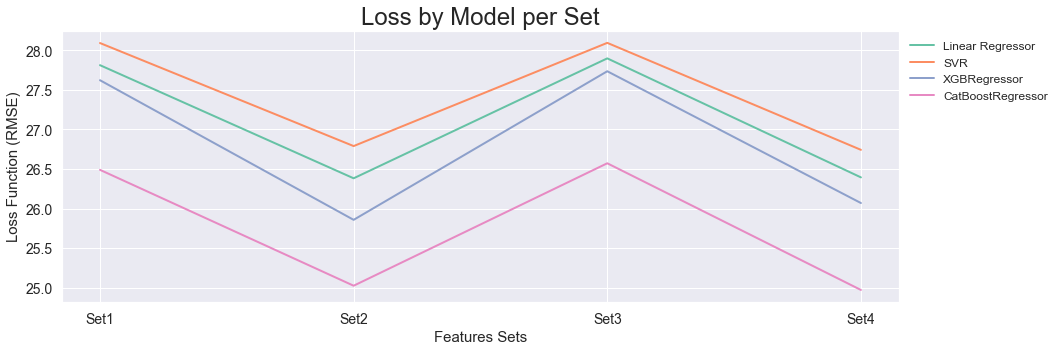

In [61]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

for i in result.Model[:4]:
    plt.plot(
        result[result.Model==i]['Features'], 
        result[result.Model==i]['Loss Function (RMSE)'], 
        linestyle= "-", 
        alpha=1., linewidth=2, 
        label = i
    )
    
    plt.legend()
    leg = plt.legend(bbox_to_anchor=(1.0, 1.0), ncol = 1, shadow = False, fancybox = False, frameon = False, numpoints = 1)
    leg.get_frame().set_alpha(0.5)
    
    plt.xlabel("Features Sets")
    plt.ylabel("Loss Function (RMSE)")
    plt.title("Loss by Model per Set")

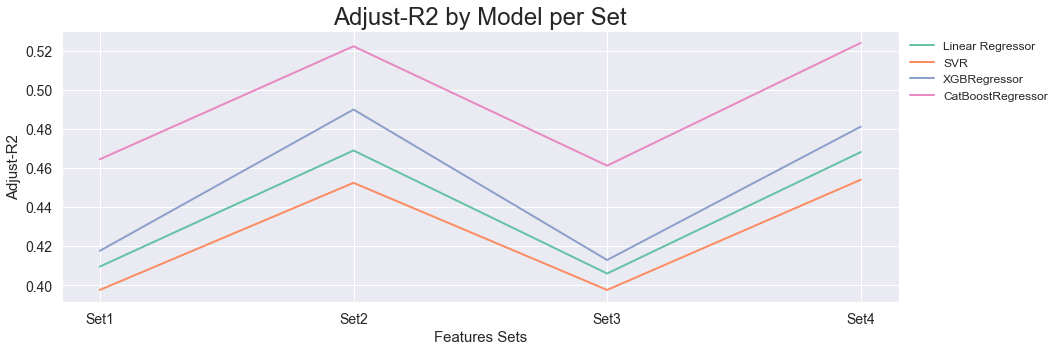

In [60]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

for i in result.Model[:4]:
    plt.plot(
        result[result.Model==i]['Features'], 
        result[result.Model==i]['Adjust-R2'], 
        linestyle= "-", 
        alpha=1., linewidth=2, 
        label = i
    )
    
    plt.legend()
    leg = plt.legend(bbox_to_anchor=(1.0, 1.0), ncol = 1, shadow = False, fancybox = False, frameon = False, numpoints = 1)
    leg.get_frame().set_alpha(0.5)
    
    plt.xlabel("Features Sets")
    plt.ylabel("Adjust-R2")
    plt.title("Adjust-R2 by Model per Set")

In [18]:
# Structure

df_pred = y_test.copy()
df_pred.rename(columns={'total_minutes':'true'}, inplace=True)
df_pred['pred_lr'] = y_pred_dlr
df_pred['pred_XGBoost'] = y_pred_dxgb
df_pred['pred_CatBoost'] = y_pred_dcb
df_pred

,true,pred_lr,pred_XGBoost,pred_CatBoost
order_id,,,,
46481fb6d2fe91d0799daf1a50a590bc,57.089103,67.966290,73.926285,78.735888
514993839baa6200a1dbf2eabc8050be,56.639223,59.154679,73.498215,71.840039
35a8c1e84372780314dc129ae42d5f2c,61.155393,65.394442,59.331005,59.988475
5f77dbfaebe65df5acf884af2ef75eb1,52.199563,68.109073,74.272713,74.022232
8a1bc583fe2ce6702fcca183dd1840b1,150.077921,107.969662,107.873146,110.638333
...,...,...,...,...
2205f52b32dbff8ae8b74c0e008abea1,128.368925,112.727360,121.711403,113.531319
ff3fa5b6175d0674764fb85377886615,48.366400,67.480570,56.931664,59.118728
233baad481af6d3c625955762b53f788,38.855142,43.543651,54.809006,60.076952
